<font color='blue'><b><h1>Project Description</h1></font></b>


<font color='blue'><b><h1>Project Title:</h1></font></b>

<b>Bitcoin Transactions Latency Forecasting Dataset</b>




<font color='teal'><b><h1> Step 1</h1></font></b> 

<font color='pink'><b><h2> Data Exploration and Preprocessing:</h2></font></b> 


a. Load the dataset and examine the columns, their data types,and any missing values.

b. Convert any categorical features to numerical features using one-hot encoding or label encoding.

c. Split the data into training and testing sets.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("processed_final_2.csv")
print("done")

done


In [4]:
df

,Unnamed: 0,DescendantCount,DescendantFee,DescendantSize,EntryBlock,ExitTime,EntryTime,TxSize,TxFee,TxFeePkb,TxIn,TxOut,ExitBlock,BlocksToConfirm,PPF,SecSinceLB,Offset,CountOnEntryTime,BtcPrice
0,0,0,0,111,659878,1607047969,1607047878,193,18886,97.854922,1,1,659879,1,0.003545,0.0,597253,941.0,19378.0
1,161,0,0,0,659878,1607047969,1607047881,224,18387,82.084821,1,2,659879,1,0.006719,3.0,689593,1045.0,19378.0
2,162,0,0,0,659878,1607047969,1607047881,225,18306,81.360000,1,2,659879,1,0.001750,3.0,689818,1046.0,19378.0
3,163,0,0,0,659878,1607047969,1607047881,192,14475,75.390625,1,1,659879,1,0.015290,3.0,692069,1054.0,19378.0
4,164,0,0,0,659878,1607047969,1607047881,224,2034,9.080357,1,2,659879,1,0.000768,3.0,817058,1159.0,19378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26031683,26090271,1,10975,450,672223,1614307774,1614297556,224,5575,24.888393,1,2,672239,16,0.025855,399.0,2866615,3547.0,46857.0
26031684,26090272,0,0,142,672218,1614307774,1614296524,223,4260,19.103139,1,2,672239,21,0.007549,162.0,7748030,9392.0,47674.0
26031685,26090273,1,20574,891,672220,1614307774,1614296796,373,9024,24.193029,2,2,672239,19,0.160787,38.0,6115802,7205.0,47246.0
26031686,26090267,0,0,0,672224,1614307774,1614297769,224,5575,24.888393,1,2,672239,15,0.037986,94.0,2149544,2823.0,46688.0


<font color='green'><b><h3>Handle any missing or null values in the dataset.</h3></font></b> 

In [5]:
df=df.dropna()

<font color='green'><b><h3>checking and conversion of datatypes</h3></font></b> 

In [6]:
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0', 'DescendantCount', 'DescendantFee', 'DescendantSize',
       'EntryBlock', 'ExitTime', 'EntryTime', 'TxSize', 'TxFee', 'TxFeePkb',
       'TxIn', 'TxOut', 'ExitBlock', 'BlocksToConfirm', 'PPF', 'SecSinceLB',
       'Offset', 'CountOnEntryTime', 'BtcPrice'],
      dtype='object')
Unnamed: 0            int64
DescendantCount       int64
DescendantFee         int64
DescendantSize        int64
EntryBlock            int64
ExitTime              int64
EntryTime             int64
TxSize                int64
TxFee                 int64
TxFeePkb            float64
TxIn                  int64
TxOut                 int64
ExitBlock             int64
BlocksToConfirm       int64
PPF                 float64
SecSinceLB          float64
Offset                int64
CountOnEntryTime    float64
BtcPrice            float64
dtype: object


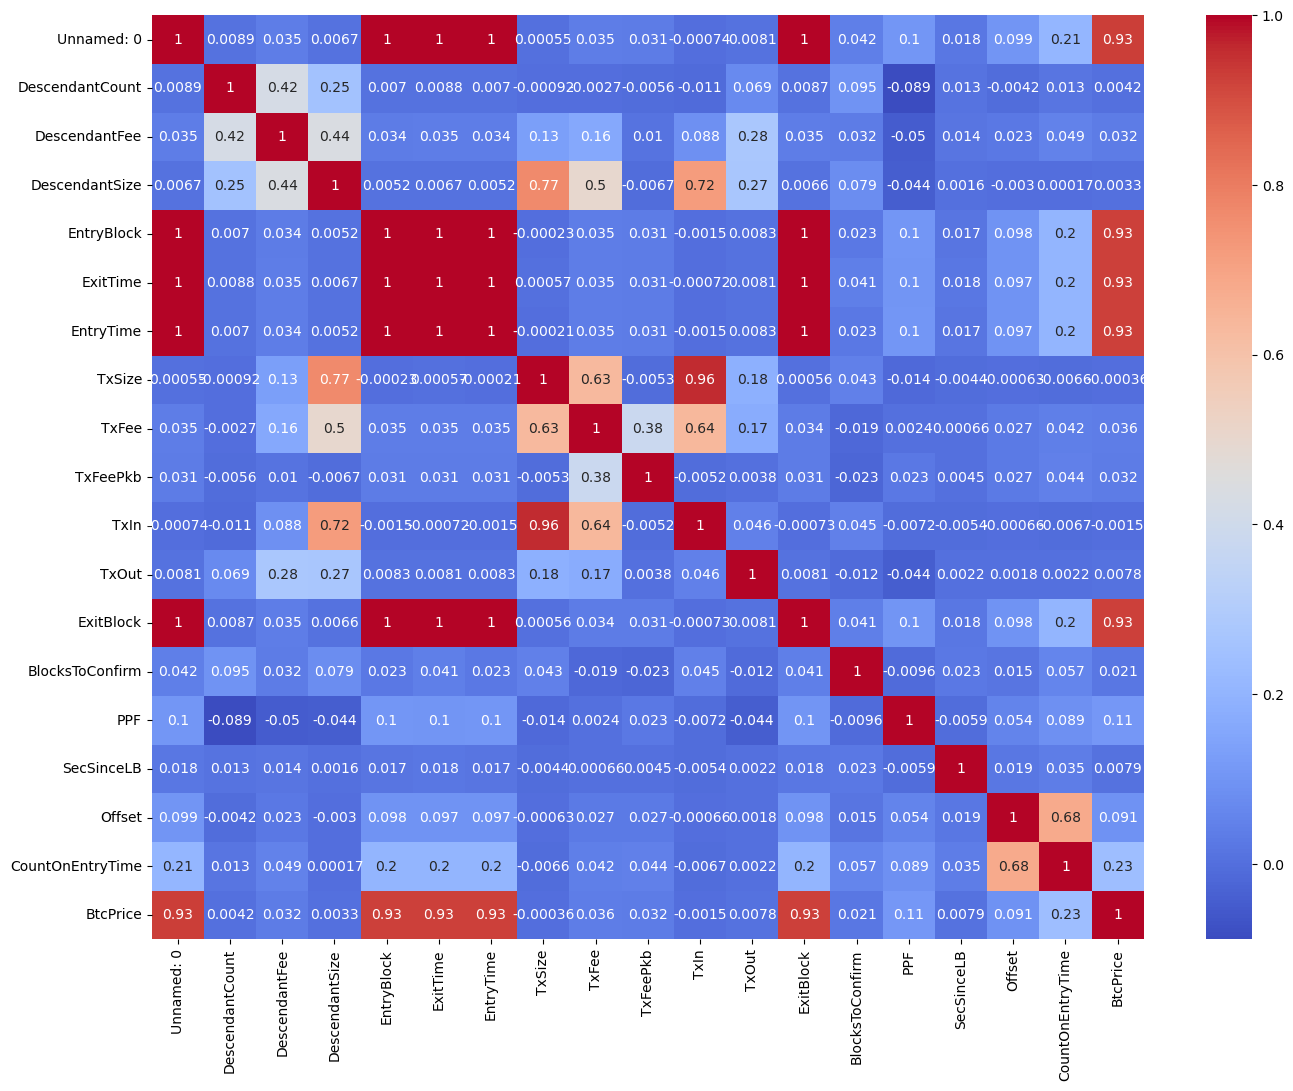

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<font color='green'><b><h3>checking for duplicate rows </h3></font></b> 

In [8]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# If you want to see the duplicate rows themselves, you can use boolean indexing to extract them
duplicate_records = df[duplicate_rows]
print("Duplicate records:")
print(duplicate_records)

Number of duplicate rows: 0
Duplicate records:
Empty DataFrame
Columns: [Unnamed: 0, DescendantCount, DescendantFee, DescendantSize, EntryBlock, ExitTime, EntryTime, TxSize, TxFee, TxFeePkb, TxIn, TxOut, ExitBlock, BlocksToConfirm, PPF, SecSinceLB, Offset, CountOnEntryTime, BtcPrice]
Index: []


# 

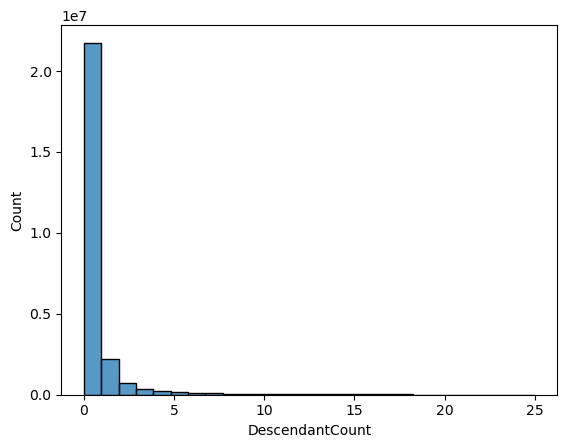

In [9]:
# Histogram of age
sns.histplot(df, x="DescendantCount")
plt.show()

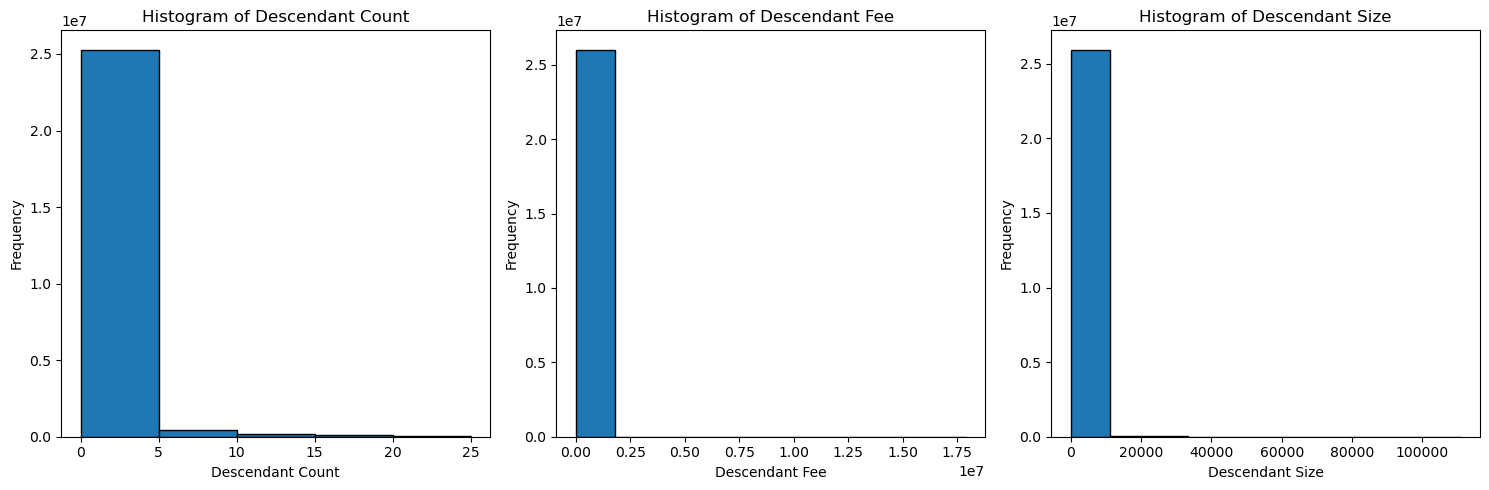

In [10]:


# Create histograms for DescendantCount, DescendantFee, and DescendantSize

# Set up subplots for all three histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histogram for DescendantCount
axes[0].hist(df['DescendantCount'], bins=5, edgecolor='black')
axes[0].set_xlabel('Descendant Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Descendant Count')

# Plot histogram for DescendantFee
axes[1].hist(df['DescendantFee'], bins=10, edgecolor='black')
axes[1].set_xlabel('Descendant Fee')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Descendant Fee')

# Plot histogram for DescendantSize
axes[2].hist(df['DescendantSize'], bins=10, edgecolor='black')
axes[2].set_xlabel('Descendant Size')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Descendant Size')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## outlier detection using boxplots

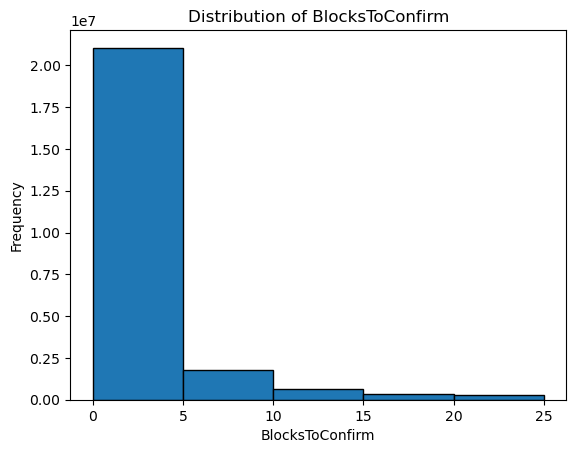

In [11]:
# Plot the distribution of BlocksToConfirm
bins = [0, 5, 10, 15,20, 25] 
plt.hist(df['BlocksToConfirm'], bins=bins,edgecolor='black')
plt.xlabel('BlocksToConfirm')
plt.ylabel('Frequency')
plt.title('Distribution of BlocksToConfirm')
plt.show()

/Users/apple/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


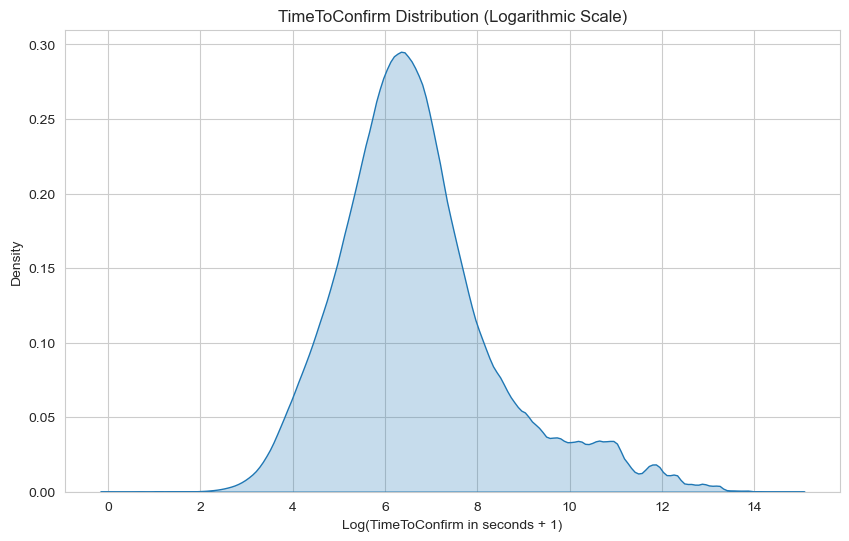

In [12]:
# Calculate the time to confirm transactions
df['TimeToConfirm'] = df['ExitTime'] - df['EntryTime']

# Set the style of the visualization
sns.set_style('whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the KDE of the logarithm of the transaction sizes
sns.kdeplot(x=np.log1p(df['TimeToConfirm']), fill=True)

plt.title('TimeToConfirm Distribution (Logarithmic Scale)')
plt.xlabel('Log(TimeToConfirm in seconds + 1)')
plt.ylabel('Density')
plt.show()

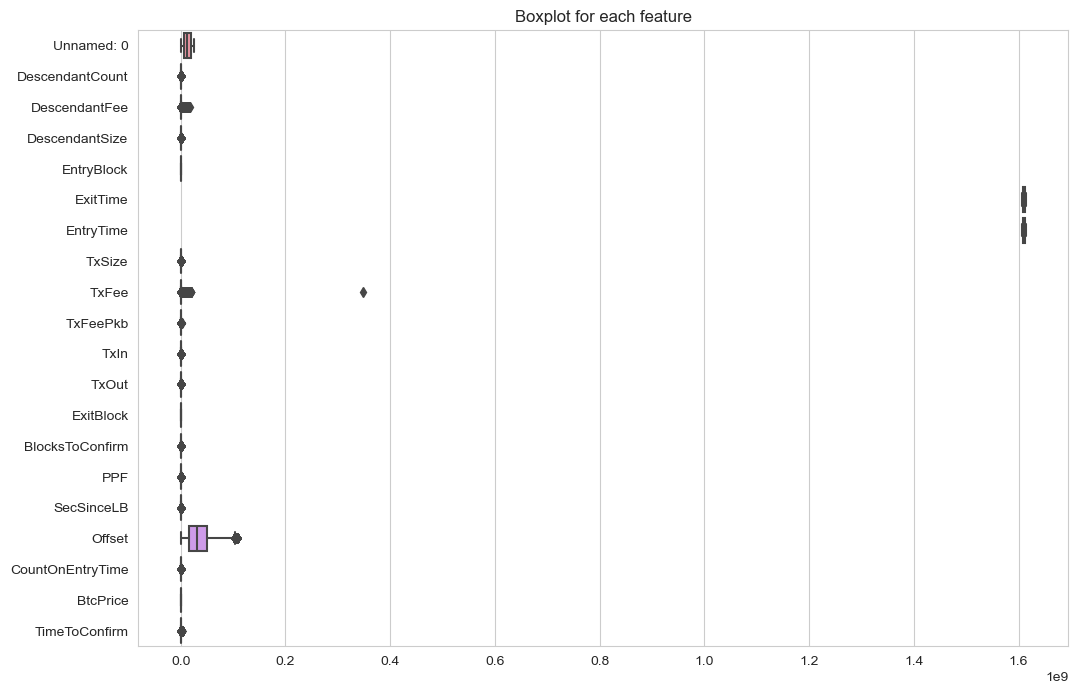

In [13]:
# Boxplot the z-scores to visualize the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for each feature")
plt.show()

<font color='green'><b><h3> bitcoin price over time  </h3></font></b>

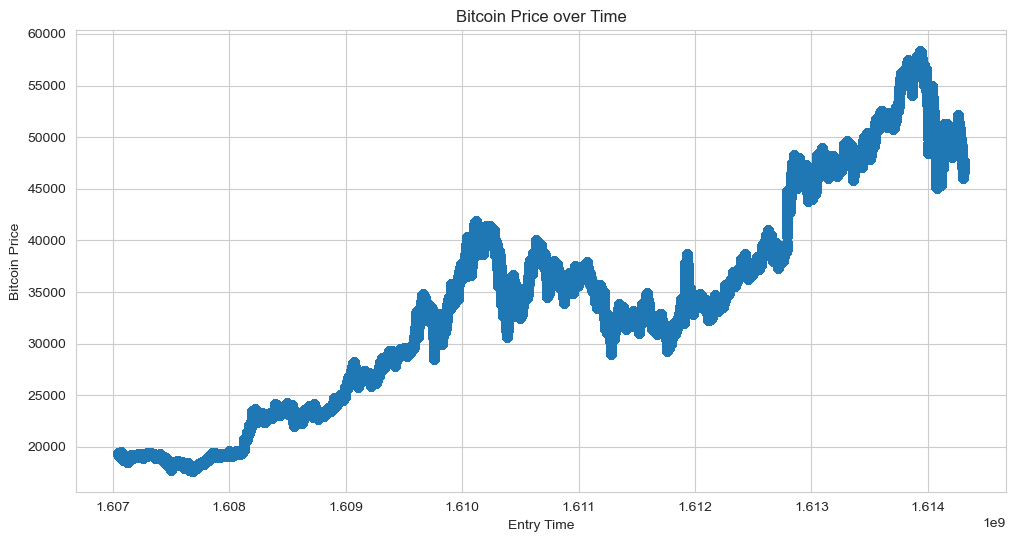

In [14]:

# Sort the DataFrame by 'EntryTime' to ensure the data is plotted in chronological order
df_sorted = df.sort_values(by='EntryTime')

# Create a line plot for 'BtcPrice' over time ('EntryTime')
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['EntryTime'], df_sorted['BtcPrice'], marker='o', linestyle='-')
plt.xlabel('Entry Time')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price over Time')
plt.grid(True)
plt.show()


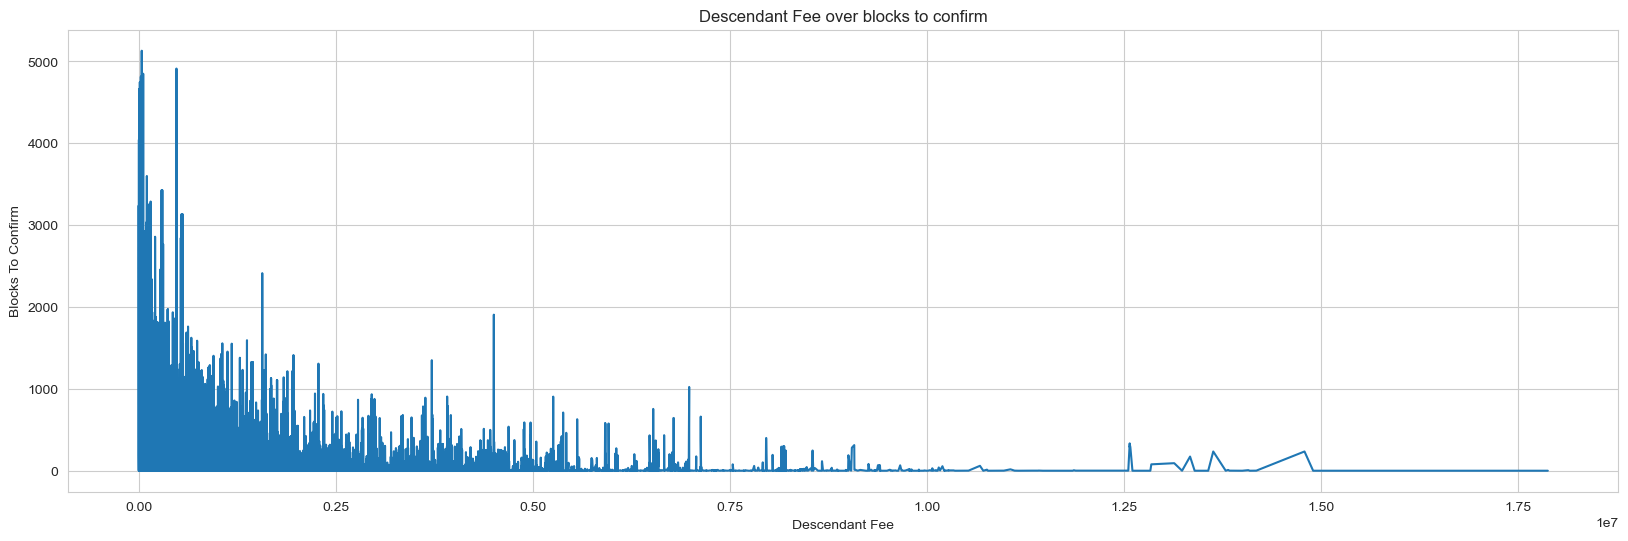

In [15]:

# Sort the DataFrame by 'descendant fee' to ensure the data is plotted in chronological order
df_sorted = df.sort_values(by='DescendantFee')

# Create a line plot
plt.figure(figsize=(20, 6))
plt.plot(df_sorted['DescendantFee'], df_sorted['BlocksToConfirm'], linestyle='solid')
plt.xlabel('Descendant Fee')
plt.ylabel('Blocks To Confirm')
plt.title('Descendant Fee over blocks to confirm')
plt.grid(True)
plt.show()

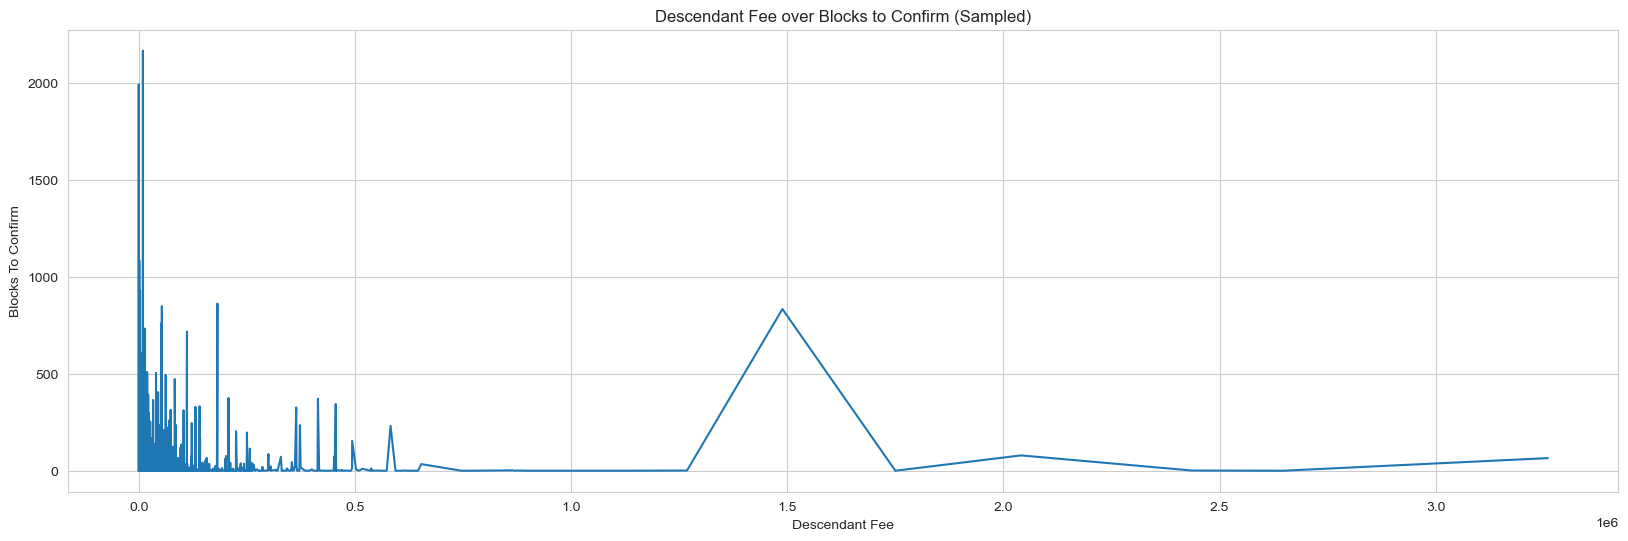

In [16]:
# Randomly sample a subset of the DataFrame (adjust 'n' to control the sample size)
sample_size = 10000  # Change this value to adjust the sample size
df_sampled = df.sample(n=sample_size)

# Sort the sampled DataFrame by 'DescendantFee' to ensure the data is plotted in chronological order
df_sorted = df_sampled.sort_values(by='DescendantFee')

# Create a line plot
plt.figure(figsize=(20, 6))
plt.plot(df_sorted['DescendantFee'], df_sorted['BlocksToConfirm'], linestyle='solid')
plt.xlabel('Descendant Fee')
plt.ylabel('Blocks To Confirm')
plt.title('Descendant Fee over Blocks to Confirm (Sampled)')
plt.grid(True)
plt.show()

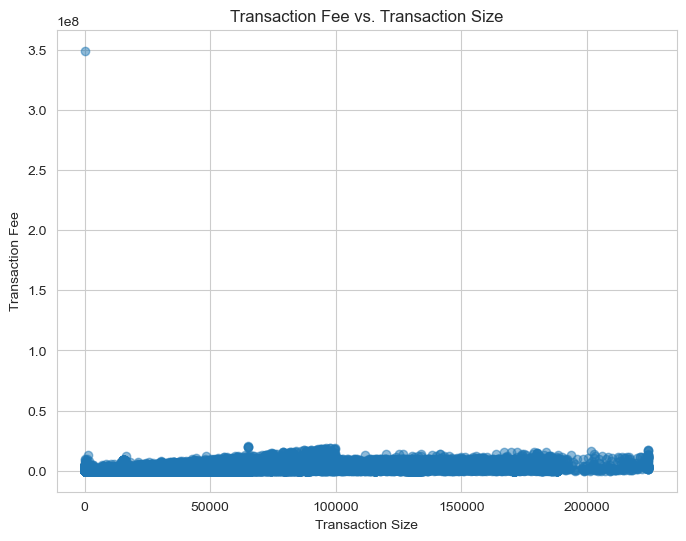

In [17]:
# Create a scatter plot for 'TxFee' vs 'TxSize'
plt.figure(figsize=(8, 6))
plt.scatter(df['TxSize'], df['TxFee'], alpha=0.5)
plt.xlabel('Transaction Size')
plt.ylabel('Transaction Fee')
plt.title('Transaction Fee vs. Transaction Size')
plt.grid(True)
plt.show()

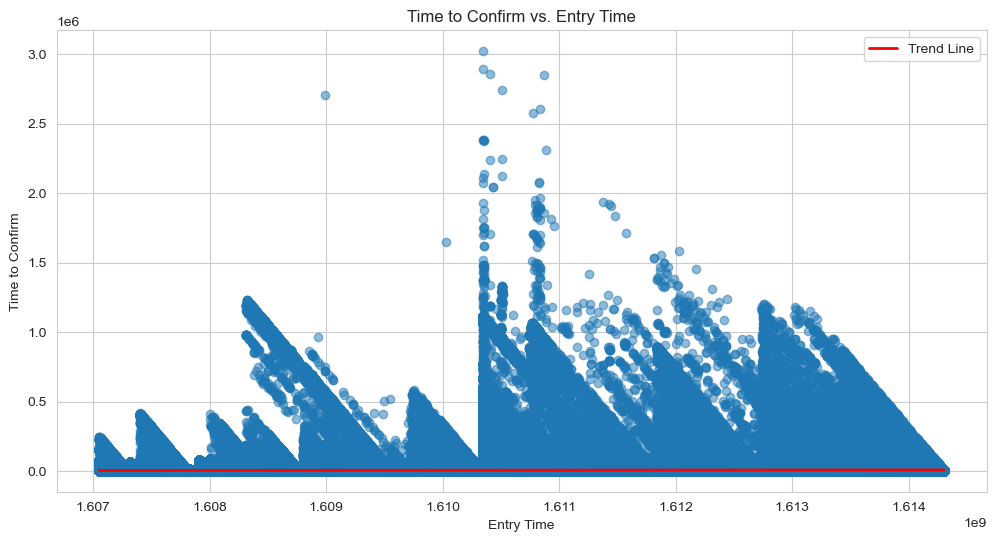

In [18]:
# Sort the DataFrame by 'EntryTime' to ensure the data is plotted in chronological order
df_sorted = df.sort_values(by='EntryTime')

# Create a scatter plot for 'EntryTime' vs 'TimeToConfirm'
plt.figure(figsize=(12, 6))
plt.scatter(df_sorted['EntryTime'], df_sorted['TimeToConfirm'], alpha=0.5)
plt.xlabel('Entry Time')
plt.ylabel('Time to Confirm')
plt.title('Time to Confirm vs. Entry Time')

# Fit a trend line using numpy.polyfit
trend_coefficients = np.polyfit(df_sorted['EntryTime'], df_sorted['TimeToConfirm'], 1)
trend_line = np.polyval(trend_coefficients, df_sorted['EntryTime'])

# Plot the trend line
plt.plot(df_sorted['EntryTime'], trend_line, color='red', linewidth=2, label='Trend Line')

plt.legend()
plt.grid(True)
plt.show()


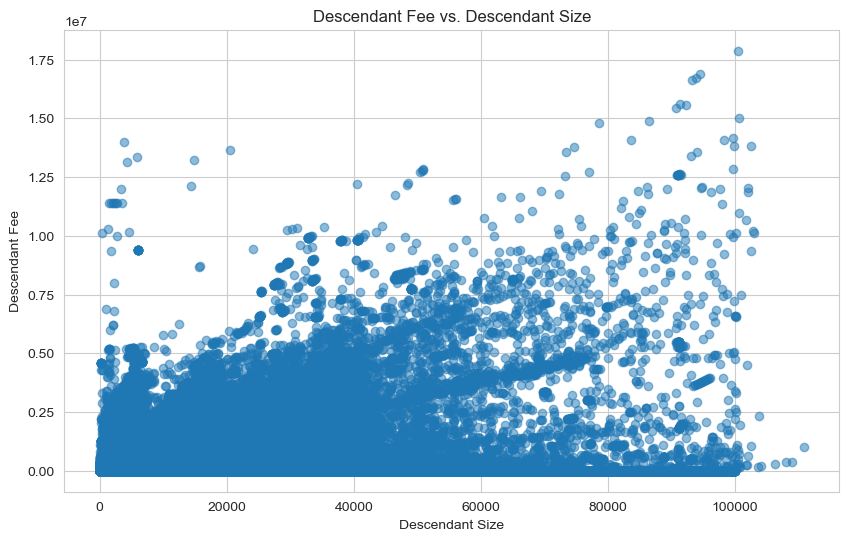

In [19]:
# Create a scatter plot for 'DescendantSize' vs 'DescendantFee'
plt.figure(figsize=(10, 6))
plt.scatter(df['DescendantSize'], df['DescendantFee'], alpha=0.5)
plt.xlabel('Descendant Size')
plt.ylabel('Descendant Fee')
plt.title('Descendant Fee vs. Descendant Size')
plt.grid(True)
plt.show()

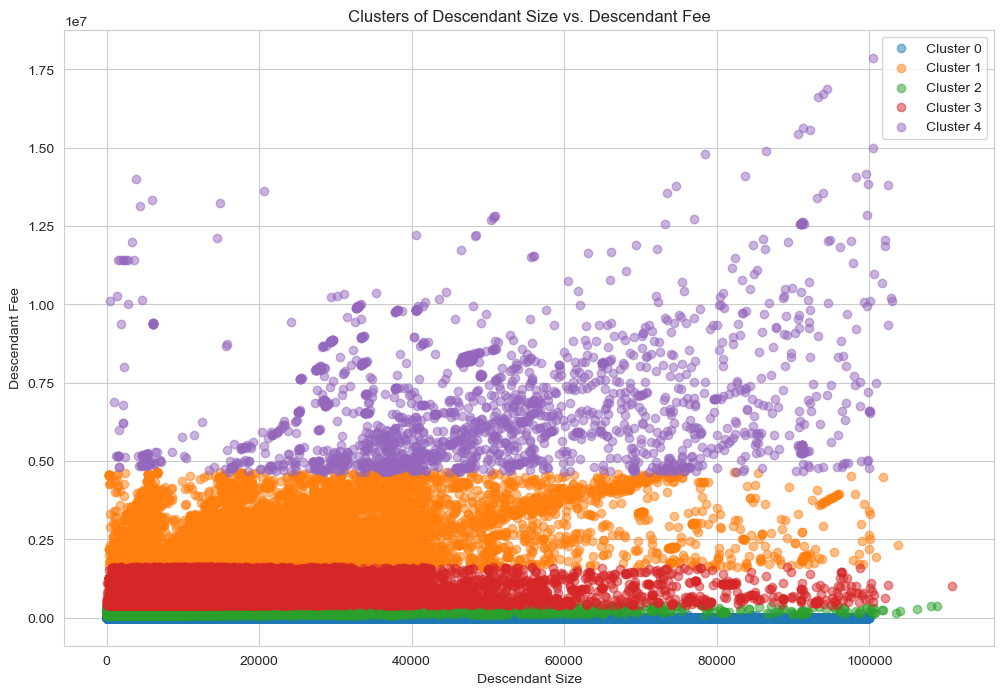

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already loaded your data into a DataFrame called 'df'

# Extract the features for clustering
X = df[['DescendantSize', 'DescendantFee']]

# Choose the number of clusters (you can adjust this based on your data and needs)
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters,n_init=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Create separate DataFrames for each cluster
cluster_dfs = [df[df['Cluster'] == i] for i in range(num_clusters)]

# Visualize each cluster separately using scatter plots
plt.figure(figsize=(12, 8))

for i, cluster_df in enumerate(cluster_dfs):
    plt.scatter(cluster_df['DescendantSize'], cluster_df['DescendantFee'], alpha=0.5, label=f'Cluster {i}')

plt.xlabel('Descendant Size')
plt.ylabel('Descendant Fee')
plt.title('Clusters of Descendant Size vs. Descendant Fee')
plt.legend()
plt.grid(True)
plt.show()


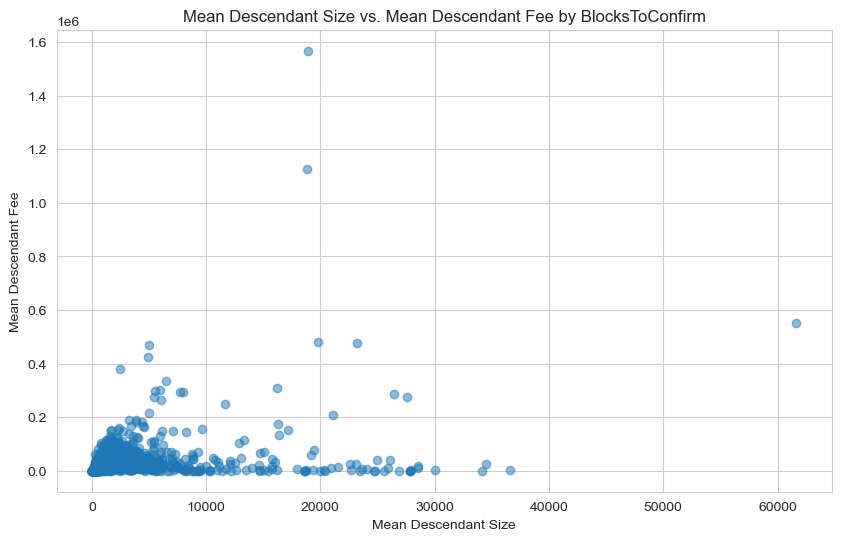

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame called 'df'

# Group the data by 'BlocksToConfirm' and calculate the mean or median of 'DescendantSize' and 'DescendantFee' for each group
grouped_data = df.groupby('BlocksToConfirm').agg({'DescendantSize': 'mean', 'DescendantFee': 'mean'})

# Create a scatter plot for the aggregated data
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['DescendantSize'], grouped_data['DescendantFee'], alpha=0.5)
plt.xlabel('Mean Descendant Size')
plt.ylabel('Mean Descendant Fee')
plt.title('Mean Descendant Size vs. Mean Descendant Fee by BlocksToConfirm')
plt.grid(True)
plt.show()


  <font color='pink'><b><h2> feature engineering  </h2></font></b>

In [22]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display the first few rows of the dataset
print(df.head())

   DescendantCount  DescendantFee  DescendantSize  EntryBlock    ExitTime  \
0                0              0             111      659878  1607047969   
1                0              0               0      659878  1607047969   
2                0              0               0      659878  1607047969   
3                0              0               0      659878  1607047969   
4                0              0               0      659878  1607047969   

    EntryTime  TxSize  TxFee   TxFeePkb  TxIn  TxOut  ExitBlock  \
0  1607047878     193  18886  97.854922     1      1     659879   
1  1607047881     224  18387  82.084821     1      2     659879   
2  1607047881     225  18306  81.360000     1      2     659879   
3  1607047881     192  14475  75.390625     1      1     659879   
4  1607047881     224   2034   9.080357     1      2     659879   

   BlocksToConfirm       PPF  SecSinceLB  Offset  CountOnEntryTime  BtcPrice  \
0                1  0.003545         0.0  597253      

In [23]:
dataset=df

In [24]:
dataset.pop("Cluster")

0           0
1           0
2           0
3           0
4           0
           ..
26031683    0
26031684    0
26031685    0
26031686    0
26031687    0
Name: Cluster, Length: 26031688, dtype: int32

In [25]:
print(dataset.head())

   DescendantCount  DescendantFee  DescendantSize  EntryBlock    ExitTime  \
0                0              0             111      659878  1607047969   
1                0              0               0      659878  1607047969   
2                0              0               0      659878  1607047969   
3                0              0               0      659878  1607047969   
4                0              0               0      659878  1607047969   

    EntryTime  TxSize  TxFee   TxFeePkb  TxIn  TxOut  ExitBlock  \
0  1607047878     193  18886  97.854922     1      1     659879   
1  1607047881     224  18387  82.084821     1      2     659879   
2  1607047881     225  18306  81.360000     1      2     659879   
3  1607047881     192  14475  75.390625     1      1     659879   
4  1607047881     224   2034   9.080357     1      2     659879   

   BlocksToConfirm       PPF  SecSinceLB  Offset  CountOnEntryTime  BtcPrice  \
0                1  0.003545         0.0  597253      

In [26]:
dataset.pop("TimeToConfirm")
dataset.pop("ExitTime")
dataset.pop("EntryTime")

0           1607047878
1           1607047881
2           1607047881
3           1607047881
4           1607047881
               ...    
26031683    1614297556
26031684    1614296524
26031685    1614296796
26031686    1614297769
26031687    1614307726
Name: EntryTime, Length: 26031688, dtype: int64

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26031688 entries, 0 to 26031687
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DescendantCount   int64  
 1   DescendantFee     int64  
 2   DescendantSize    int64  
 3   EntryBlock        int64  
 4   TxSize            int64  
 5   TxFee             int64  
 6   TxFeePkb          float64
 7   TxIn              int64  
 8   TxOut             int64  
 9   ExitBlock         int64  
 10  BlocksToConfirm   int64  
 11  PPF               float64
 12  SecSinceLB        float64
 13  Offset            int64  
 14  CountOnEntryTime  float64
 15  BtcPrice          float64
dtypes: float64(5), int64(11)
memory usage: 3.1 GB
